In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os


data_path = 'data/team_stats_cleaned.csv'

try:
    df = pd.read_csv(data_path)
    print("data read successfully!")
    #print(df.head(1))
except FileNotFoundError:
    print("file could not be found")
    df = None

if df is not None:

    # starting with linear regression as a simple baseline

    print("\nExcluding data from the 2020 season due to potential outliers.")
    df_filtered = df[df['year'] != 2020].copy()
    print(f"Original DataFrame shape: {df.shape}")
    print(f"DataFrame shape (excluding 2020): {df_filtered.shape}\n")

# we now are splitting data into training and testing sets
sorted_unique_years = sorted(df_filtered['year'].unique())

train_years = sorted_unique_years[:-1]
test_years = sorted_unique_years[-1:]

#print(f"Training on years: {train_years}.")
#print(f"Testing on year: {test_years}.")

# create the test & training dataframes
train_df = df_filtered[df_filtered['year'].isin(train_years)].copy()
test_df = df_filtered[df_filtered['year'].isin(test_years)].copy()

# filter out the columns we don't need for training
cols_to_drop = ['team', 'year', 'wins', 'win_percentage', 'losses']
existing_cols_to_drop = [col for col in cols_to_drop if col in train_df.columns]

# need an X for features and a Y for target for both taining and testing data
Y_train = train_df['win_percentage']
Y_test = test_df['win_percentage']

X_train = train_df.drop(columns=cols_to_drop, errors='ignore')
X_test = test_df.drop(columns=cols_to_drop, errors='ignore')

#print(f"\nX_Train set shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
#print(f"X_Test set shape: {X_test.shape}, Y_test shape: {Y_test.shape}")




data read successfully!

Excluding data from the 2020 season due to potential outliers.
Original DataFrame shape: (1040, 57)
DataFrame shape (excluding 2020): (910, 57)



In [26]:
# 2) feature scaling to ensure features are standardized (mean ~0, std ~1)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the same scaler but not fitting it
X_test_scaled = scaler.transform(X_test)

# 3) Linear Regression Training

#model = LinearRegression()

# too much multicollinearity, use Ridge model
model = Ridge(alpha=1.0)

# train the linear regression model
model.fit(X_train_scaled, Y_train)



Ridge()

In [27]:
# 4) make predictions

Y_pred = model.predict(X_test_scaled)

print("Predictions made on the test data.")
print("First 5 actual Y_test values:\n", Y_test.head(5))
print("First 5 predicted Y_pred values:\n", Y_pred[:5])


Predictions made on the test data.
First 5 actual Y_test values:
 907    0.692308
908    0.166667
909    0.857143
910    0.642857
911    0.769231
Name: win_percentage, dtype: float64
First 5 predicted Y_pred values:
 [0.66459902 0.27586747 0.7948955  0.63293563 0.74740513]


Mean Absolute Error (MAE): 0.0591
Mean Squared Error (MSE): 0.0053
Root Mean Squared Error (RMSE): 0.0726
R-squared (R2): 0.8782

 Predictions vs. Actual


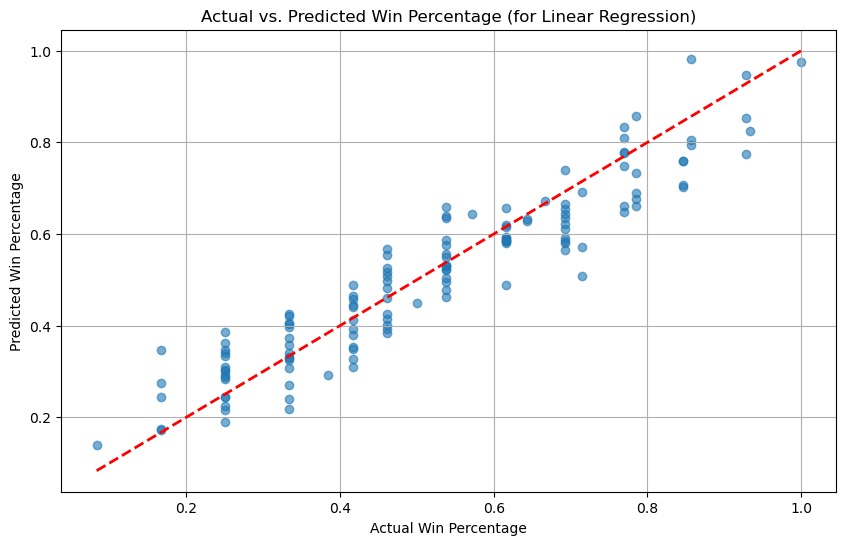


--- Linear Regression Coefficients ---
                      Feature  Coefficient  Absolute_Coefficient
1     scoring_points_game_opp    -0.118516              0.118516
47    net_scoring_points_game     0.084407              0.084407
18          pass_attempts_opp     0.060777              0.060777
13            rushing_tds_opp     0.044175              0.044175
19       pass_completions_opp    -0.032748              0.032748
7          passing_rating_opp     0.031255              0.031255
6              passing_rating     0.031076              0.031076
41         redzone_scores_opp     0.030352              0.030352
3      avg_yards_per_play_opp    -0.023913              0.023913
21               pass_tds_opp     0.023551              0.023551
40       redzone_attempts_opp    -0.023306              0.023306
12          rushing_yards_opp     0.022456              0.022456
25  interceptions_returns_opp     0.020792              0.020792
38           redzone_attempts    -0.019340        

In [28]:
# 5) model evaluation (based on mae, mse, rmse, r2)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

print("\n Predictions vs. Actual")
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')
plt.title('Actual vs. Predicted Win Percentage (for Linear Regression)')
plt.grid(True)
plt.show()


# Model Coefficients 
print("\n--- Linear Regression Coefficients ---")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
print(coefficients)